<a href="https://colab.research.google.com/github/AdvaithUthaman/AdvaithUthaman/blob/main/NetflixData_Cleaning%2C_AnalysisandVisualization%2Cproj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data=pd.read_csv('/content/netflix1.csv')
print(data.head())
data.isnull().sum()

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

data['duration_minutes'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
data['seasons'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in x else None)

data['genres'] = data['listed_in'].str.split(', ').str.join(', ')

data = data.drop_duplicates()

data['release_year'] = data['release_year'].astype(int)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   country           8790 non-null   object        
 5   date_added        8790 non-null   datetime64[ns]
 6   release_year      8790 non-null   int64         
 7   rating            8790 non-null   object        
 8   duration          8790 non-null   object        
 9   listed_in         8790 non-null   object        
 10  duration_minutes  6126 non-null   float64       
 11  seasons           2664 non-null   float64       
 12  genres            8790 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 892.9+ KB


In [ ]:
print(f"Number of column :{data.shape[1]}\nNumber of rows :{data.shape[0]}")

Number of column :13
Number of rows :8790


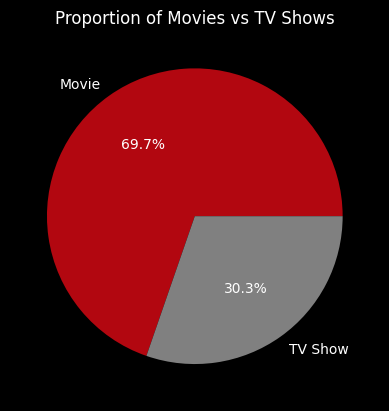

In [ ]:
plt.style.use('dark_background')
s
content_counts = data['type'].value_counts()
content_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#b20710', 'gray'],
    labels=content_counts.index,
    textprops={'color': 'white'}
)
plt.title("Proportion of Movies vs TV Shows", color='white')
plt.ylabel("", color='white')
plt.show()

<ipython-input-33-d6dae13480eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


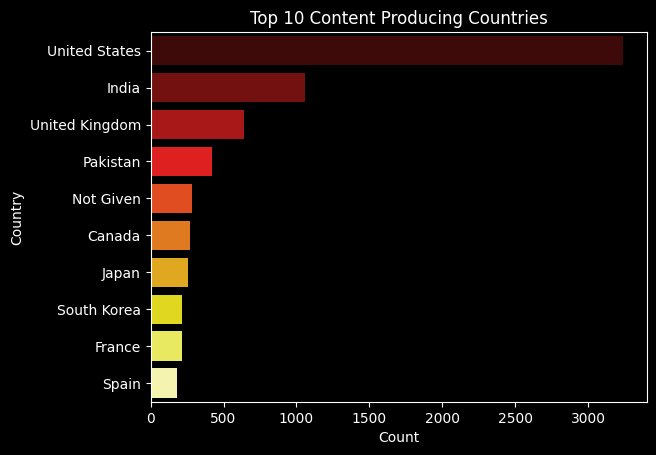

In [ ]:
country_counts = data['country'].value_counts().head(10)
sns.barplot(
    y=country_counts.index,
    x=country_counts.values,
    palette="hot"
)
plt.title("Top 10 Content Producing Countries", color='white')
plt.xlabel("Count", color='white')
plt.ylabel("Country", color='white')
plt.show()

<ipython-input-85-94c74b7a56de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


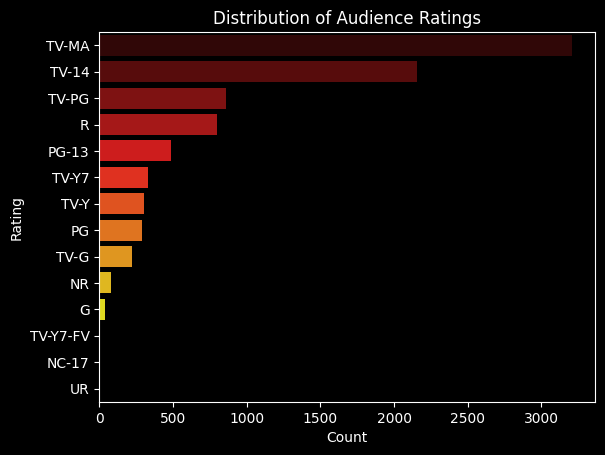

In [ ]:
sns.countplot(
    y='rating',
    data=data,
    order=data['rating'].value_counts().index,
    palette="hot"
)
plt.title("Distribution of Audience Ratings", color='white')
plt.xlabel("Count", color='white')
plt.ylabel("Rating", color='white')
plt.show()


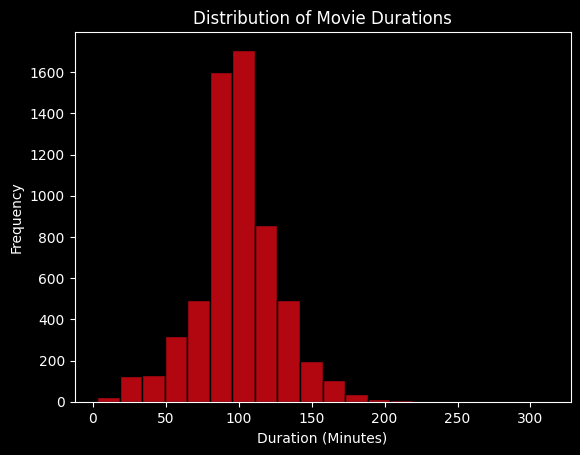

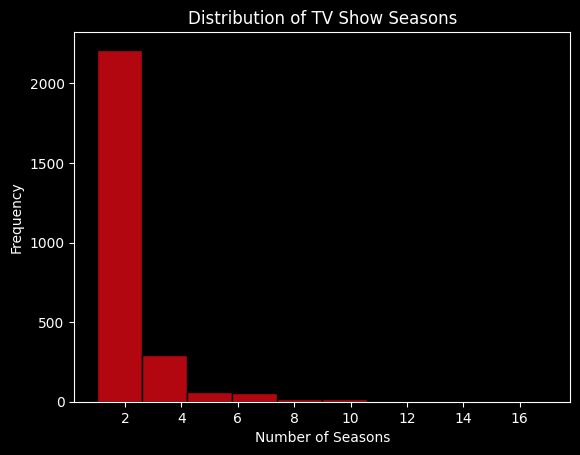

In [ ]:
data['duration_minutes'].dropna().plot(
    kind='hist',
    bins=20,
    color='#b20710',
    edgecolor='black'
)
plt.title("Distribution of Movie Durations", color='white')
plt.xlabel("Duration (Minutes)", color='white')
plt.ylabel("Frequency", color='white')
plt.show()

data['seasons'].dropna().plot(
    kind='hist',
    bins=10,
    color='#b20710',
    edgecolor='black'
)
plt.title("Distribution of TV Show Seasons", color='white')
plt.xlabel("Number of Seasons", color='white')
plt.ylabel("Frequency", color='white')
plt.show()

<ipython-input-93-547ea4264a3c>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


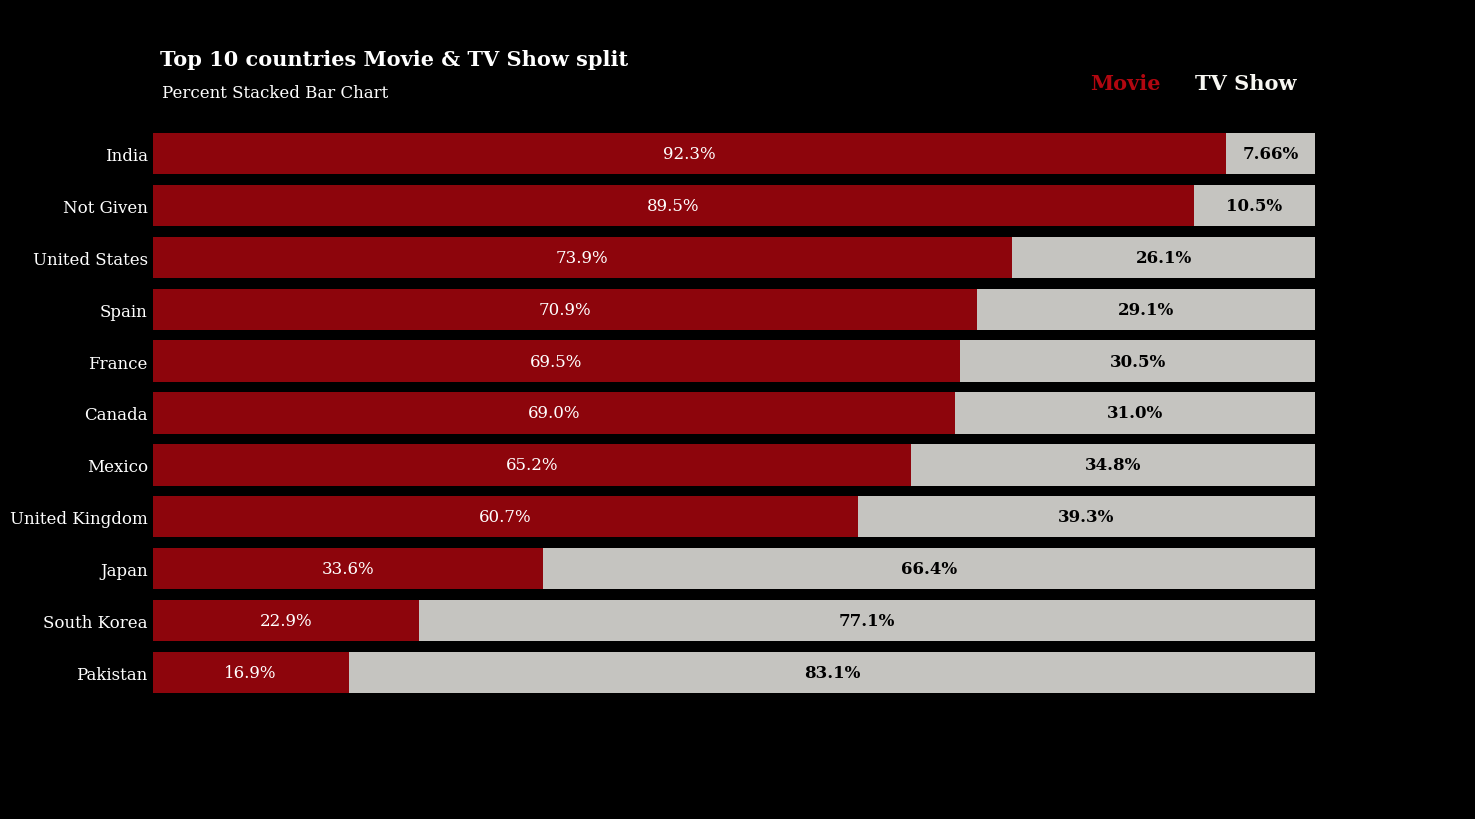

In [ ]:
data['first_country'] = data['country'].str.split(', ').str[0]

country_order = data['first_country'].value_counts()[:11].index
data_q2q3 = data[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'],
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'],
        color='#F8F7F2', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='black')


fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#F8F7F2')


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<ipython-input-82-bf71036436e7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='hot')
<ipython-input-82-bf71036436e7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='hot')


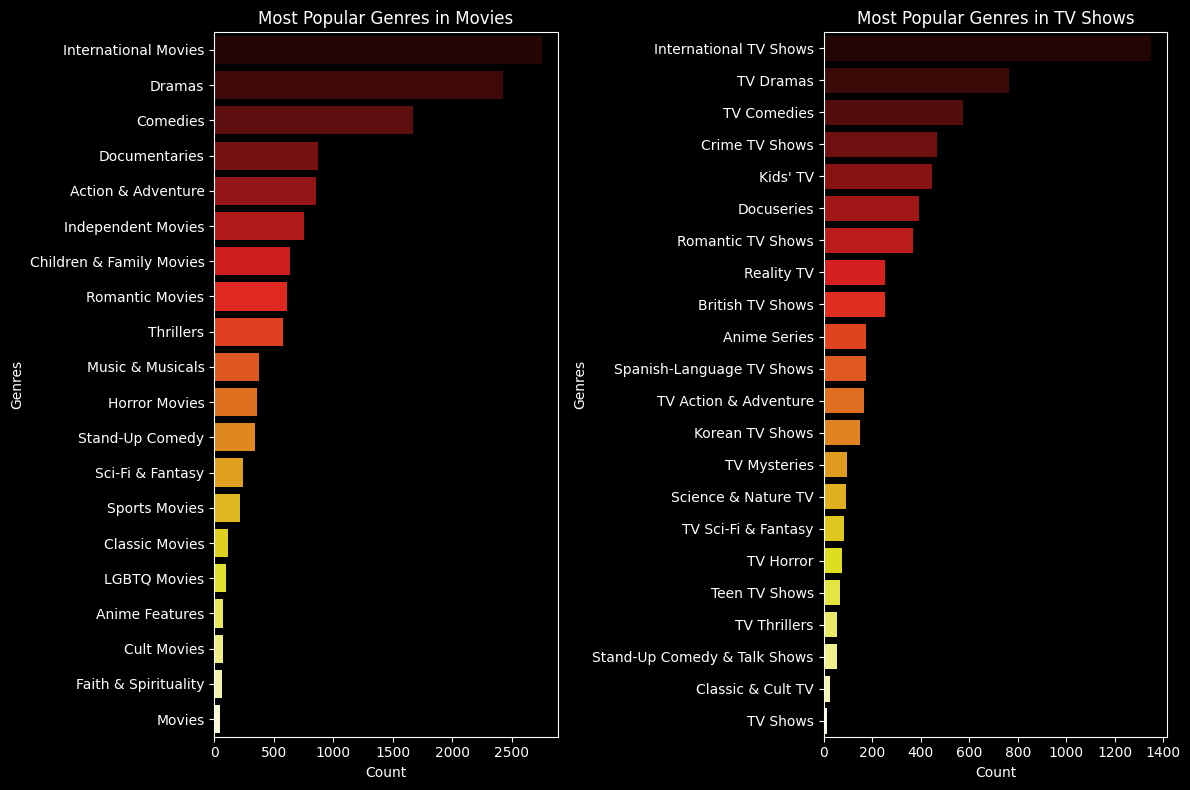

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['genre'] = data['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))

df_movies = data[data['type'] == 'Movie']
df_tv = data[data['type'] == 'TV Show']

movie_genres = df_movies['genre'].explode().value_counts()

tv_genres = df_tv['genre'].explode().value_counts()

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='hot')
plt.title("Most Popular Genres in Movies")
plt.xlabel("Count", color='white')
plt.ylabel("Genres", color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.subplot(1, 2, 2)
sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='hot')
plt.title("Most Popular Genres in TV Shows")
plt.xlabel("Count", color='white')
plt.ylabel("Genres", color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

<ipython-input-38-55423c6838f8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette=['#DF0D00'])
<ipython-input-38-55423c6838f8>:21: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_directors.values, y=top_directors.index, palette=['#DF0D00'])


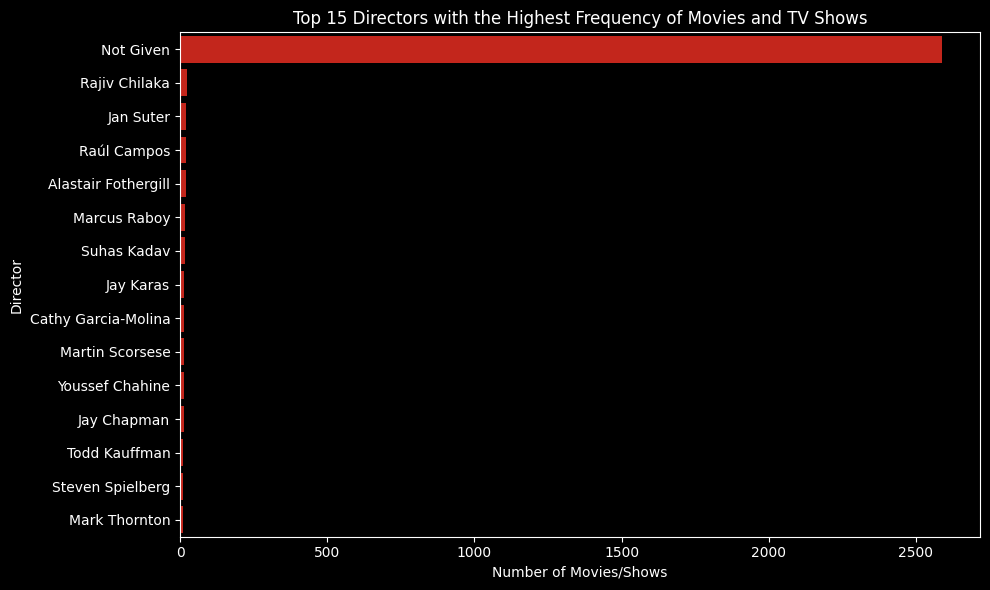

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data.dropna(subset=['director'])

data['directors'] = data['director'].apply(lambda x: x.split(','))

directors = data.explode('directors')['directors'].str.strip()

director_counts = directors.value_counts()

top_directors = director_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette=['#DF0D00'])
plt.title('Top 15 Directors with the Highest Frequency of Movies and TV Shows', color='white')
plt.xlabel('Number of Movies/Shows', color='white')
plt.ylabel('Director', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()

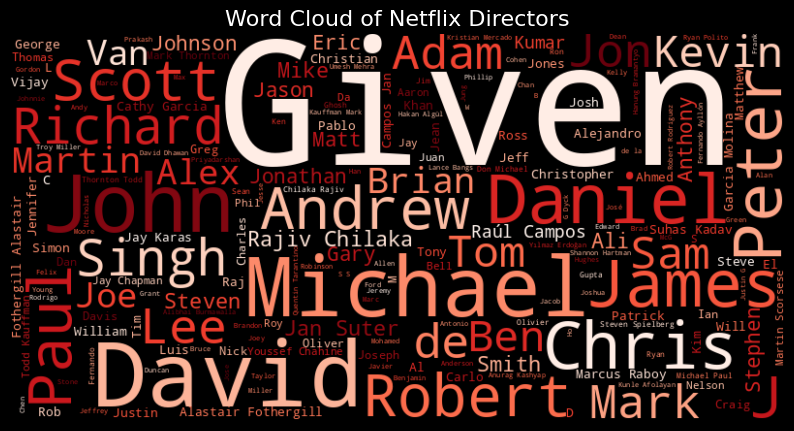

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = data.dropna(subset=['director'])
director_text = ' '.join(data['director'].str.replace(',', ' ').values)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds',
    max_words=200,
    contour_color='white'
).generate(director_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Directors", color='white', fontsize=16)
plt.show()

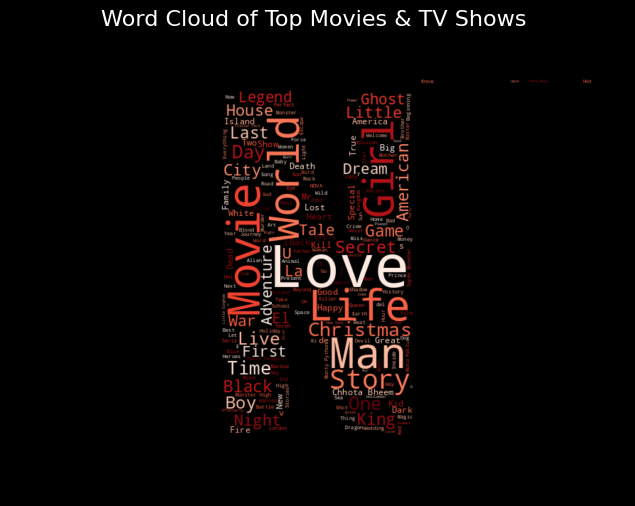

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

mask = np.array(Image.open('/content/netflix-n-black7018.jpg'))
movies = data[data['type'] == 'Movie']['title'].astype(str).tolist()
tv_shows = data[data['type'] == 'TV Show']['title'].astype(str).tolist()

text = ' '.join(movies * 2 + tv_shows)

wordcloud = WordCloud(
    width=8000,
    height=8000,
    background_color='black',
    colormap='Reds',
    max_words=200,
    mask=mask,
    contour_color='white',
    stopwords=STOPWORDS
).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Movies & TV Shows ", color='white', fontsize=16)
plt.show()